In [1]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

# EDA:

The first step in any Data Science project is to understand the data that is given to us. There are few standard questions you can ask in order to get the understanding:
* What is the size of the dataset?
* What is the time range of the data?
* What is the meaning of each column and its values in the dataset? (can get this information from Data Dictionary)
* What is the distribution and unique values for each column? (univariate analysis)
* What is the distribution and unique values for some combinations of columns? (bivariate & multivariate analysis)

If you try to answer these questions with the help of data, then you would get a good understanding of the data which can be leveraged in **Feature Engineering** & **Model Building** part of the project.

# Contents:

I. [Loading the Data:](#Loading-the-Data:)

II. [Data Preprocessing:](#Data-Preprocessing:)

* [Extracting Location details:](#Extracting-Location-details:)

* [Cleaning all the text columns in the data:](#Cleaning-all-the-text-columns-in-the-data:)

* [Encoding Binary Features:](#Encoding-Binary-Features:)

* [Fixing Numerical Features:](#Fixing-Numerical-Features:)

III. [Univariate Analysis:](#Univariate-Analysis:)


*  [Distribution of Location and Sub-Area:](#Distribution-of-Location-and-Sub-Area:)

* [Distribution of Company and Township:](#Distribution-of-Company-and-Township:)

* [Distribution of Property Area and Price:](#Distribution-of-Property-Area-and-Price:)

    
    
IV. [Multivariate Analysis:](#Multivariate-Analysis:)

* [How Property area correlates with the price?](#How-Property-area-correlates-with-the-price?)

* [How each amenities correlates with the price?](#How-each-amenities-correlates-with-the-price?)

* [What are the 3 main amenities that the top 10% priced properties have?](#What-are-the-3-main-amenities-that-the-top-10%-priced-properties-have?)

V. [Treating Nulls and saving the data:](#Treating-Nulls-and-saving-the-data:)

## Loading the Data:

([Contents:](#Contents:))

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time 
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data
data= pd.read_excel('data/Pune Real Estate Data.xlsx')
print(data.shape)
data.head()

(200, 18)


,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...


In [4]:
df = data.copy()

## Data Preprocessing:

#### Extracting Location details:

([Contents:](#Contents:))

In [5]:
df['Location'].apply(lambda x: x.split(',')[2].lower().strip())

0      india
1      india
2      india
3      india
4      india
5      india
6      india
7      india
8      india
9      india
10     india
11     india
12     india
13     india
14     india
15     india
16     india
17     india
18     india
19     india
20     india
21     india
22     india
23     india
24     india
25     india
26     india
27     india
28     india
29     india
30     india
31     india
32     india
33     india
34     india
35     india
36     india
37     india
38     india
39     india
40     india
41     india
42     india
43     india
44     india
45     india
46     india
47     india
48     india
49     india
50     india
51     india
52     india
53     india
54     india
55     india
56     india
57     india
58     india
59     india
60     india
61     india
62     india
63     india
64     india
65     india
66     india
67     india
68     india
69     india
70     india
71     india
72     india
73     india
74     india
75     india
76     india

In [6]:
# Extracting State and Country separately from the Location Column
df['City'] = df['Location'].apply(lambda x: x.split(',')[0].lower().strip())
df['State'] = df['Location'].apply(lambda x: x.split(',')[1].lower().strip())
df['Country'] = df['Location'].apply(lambda x: x.split(',')[2].lower().strip())
df.head(3)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india


#### Cleaning all the text columns in the data:

([Contents:](#Contents:))

##### Property Type:

In [7]:
df['Propert Type'].value_counts()

2bhk           56
3BHK           28
3bhk           19
2BHK           18
2 bhk          16
3 bhk          10
1BHK            9
1bhk            7
1 BHK           3
2bhk            3
2 bhk           2
3.5 bhk         2
3.5bhk          2
2.5 bhk         2
4 bhk           2
2.5 BHK         2
3 BHK           2
5BHK            2
2 BHK           1
3bhk            1
4.5bhk          1
1bhk            1
5 bhk           1
3+2bhk          1
2+2 bhk         1
3 BHK Grand     1
3 BHK           1
4BHK            1
6BHK            1
shop            1
1 bhk           1
3  bhk          1
4bhk            1
Name: Propert Type, dtype: int64

In [8]:
# Regex to match the numbers and create a separate column
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 
df['Property Type Cleaned'] = df['Propert Type'].apply(lambda x: numbers.findall(x)[0] 
                                                       if len(numbers.findall(x)) > 0 else 0)

In [9]:
df['Property Type Cleaned'].value_counts()

2      97
3      64
1      21
4       4
2.5     4
3.5     4
5       3
6       1
0       1
4.5     1
Name: Property Type Cleaned, dtype: int64

##### Sub-Area:

In [10]:
df['Sub-Area'].value_counts()

Kharadi                     16
handewadi                   11
BT Kawade RD                10
Hinjewadi                    9
Ravet                        9
wadgaon sheri                9
hadapsar                     8
NIBM                         8
BANER                        7
pisoli                       6
kiwale                       6
vimannagar                   6
Akurdi                       6
Susgaon                      6
bavdhan budruk               6
bavdhan                      6
Karvanagar                   5
manjri                       5
Mahalunge                    5
Mundhwa                      5
dhanori                      4
Bavdhan                      4
mahalunge                    4
Balewadi                     4
tathawade                    4
KirkatWadi Sinhagad Road     3
baner                        3
Keshav Nagar                 3
ravet                        3
Undri                        2
mohammadwadi                 2
Koregaon Park                2
Baner   

In [11]:
# Number of categories before cleaning
len(df['Sub-Area'].value_counts())

39

In [12]:
df['Sub-Area Cleaned'] = df['Sub-Area'].apply(lambda x: x.lower().strip())

In [13]:
# Number of categories after cleaning
len(df['Sub-Area Cleaned'].value_counts())

34

##### Company Name:

In [14]:
# Number of categories before cleaning
len(df['Company Name'].value_counts())

37

In [15]:
df['Company Name Cleaned'] = df['Company Name'].apply(lambda x: x.lower().strip())

In [16]:
len(df['Company Name Cleaned'].value_counts())

37

##### TownShip Name/ Society Name:

In [17]:
# Number of categories before cleaning
len(df['TownShip Name/ Society Name'].value_counts())

54

In [18]:
df['TownShip Name/ Society Name Cleaned'] = df['TownShip Name/ Society Name'].apply(lambda x: x.lower().strip())

In [19]:
len(df['TownShip Name/ Society Name Cleaned'].value_counts())

54

##### Description:

In [20]:
df['Description Cleaned'] = df['Description'].apply(lambda x: x.lower().strip())

In [21]:
df.head(2)

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...


#### Encoding Binary Features:

[Contents:](#Contents:)

In [22]:
# Cleaning and encoding Binary Features
df['ClubHouse Cleaned'] = (df['ClubHouse'].apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['School / University in Township Cleaned'] = (df['School / University in Township ']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Hospital in TownShip Cleaned'] = (df['Hospital in TownShip']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Mall in TownShip Cleaned'] = (df['Mall in TownShip']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Park / Jogging track Cleaned'] = (df['Park / Jogging track']
                                                     .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Swimming Pool Cleaned'] = (df['Swimming Pool']
                                                 .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))
df['Gym Cleaned'] = (df['Gym']
                             .apply(lambda x: x.lower().strip()).map({'yes':1, 'no':0}))

In [23]:
df.tail()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes,SUPREME ESTIA - the name itself emanates a fee...,pune,maharashtra,india,3,baner,supreme,supreme estia,supreme estia - the name itself emanates a fee...,1,0,0,0,1,1,1
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes,Not every day would you come across a developm...,pune,maharashtra,india,4,baner,supreme,supreme estia,not every day would you come across a developm...,1,0,0,0,1,1,1
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes,A lifestyle of abundance that fourishes amidst...,pune,maharashtra,india,2,baner,tejraaj group,tej elevia,a lifestyle of abundance that fourishes amidst...,0,0,0,0,1,1,1
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes,"We are proud of it.We are sure, you will fall ...",pune,maharashtra,india,3,baner,tejraaj group,tej elevia,"we are proud of it.we are sure, you will fall ...",0,0,0,0,1,1,1
199,200,"Pune, Maharashtra, India",BANER,2bhk,776,90.68,9.068,VTP Reality,vtp solitaire,NaN,yes,no,no,no,yes,yes,yes,"A beautiful collection of ultra-modern homes, ...",pune,maharashtra,india,2,baner,vtp reality,vtp solitaire,"a beautiful collection of ultra-modern homes, ...",1,0,0,0,1,1,1


#### Fixing Numerical Features:

[Contents:](#Contents:)

##### Property Area:

In [24]:
numbers.findall(str("shot/tea"))

[]

In [25]:
def avg_property_area(x):
    x = numbers.findall(x)
    if len(x) == 1:
        return np.float(x[0])
    elif len(x) == 2:
        return (np.float(x[0])+np.float(x[1]))/2
    else:
        return -99
    
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)")     
df['Property Area in Sq. Ft. Cleaned'] = df['Property Area in Sq. Ft.'].apply(lambda x: avg_property_area(str(x)))

In [26]:
df[['Property Area in Sq. Ft.','Property Area in Sq. Ft. Cleaned']].sample(5)

,Property Area in Sq. Ft.,Property Area in Sq. Ft. Cleaned
44,581,581.0
137,904,904.0
10,1644,1644.0
98,575,575.0
190,665,665.0


##### Price:

In [27]:
numbers = re.compile(r"[-+]?(\d*\.\d+|\d+)") 
df['Price in lakhs Cleaned'] = (df['Price in lakhs'].apply(lambda x: np.float(numbers.findall(str(x))[0]) 
                                                           if len(numbers.findall(str(x)))>0 else np.nan ))

In [28]:
df[['Price in lakhs','Price in lakhs Cleaned']].sample(5)

,Price in lakhs,Price in lakhs Cleaned
191,13.19,13.19
98,65,65.00
106,43.2,43.20
13,58,58.00
99,84,84.00


In [29]:
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Description,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Shapoorji Paloonji comunity located in the sub...,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Township located near the lonavala hill...,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha Society is suitable for all aged group ...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Vanaha township are offering 3BHK grand prpoer...,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,The area is a hub of prestigious schools like ...,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sr. No.                                  200 non-null    int64  
 1   Location                                 200 non-null    object 
 2   Sub-Area                                 200 non-null    object 
 3   Propert Type                             200 non-null    object 
 4   Property Area in Sq. Ft.                 200 non-null    object 
 5   Price in lakhs                           200 non-null    object 
 6   Price in Millions                        199 non-null    float64
 7   Company Name                             200 non-null    object 
 8   TownShip Name/ Society Name              200 non-null    object 
 9   Total TownShip Area in Acres             51 non-null     float64
 10  ClubHouse                                200 non-n

## Univariate Analysis:

([Contents:](#Contents:))

In [31]:
features = df.columns.tolist()[18:]
print("Total Number of Features: "+str(len(features)))

Total Number of Features: 17


In [32]:
df1 = df[features]
print(df1.shape)
df1.head(3)

(200, 17)


,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0


#### Distribution of Location and Sub-Area:

([Contents:](#Contents:))

Unique Number of Cities in the Data: 1


,City,Company Name Cleaned
0,pune,200


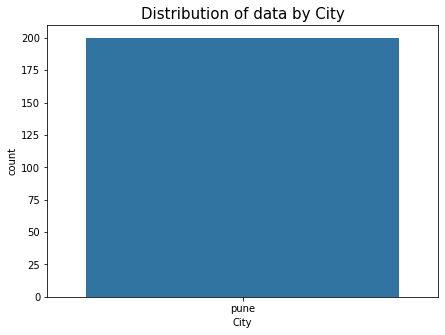

In [33]:
# Location
print(f"Unique Number of Cities in the Data: {df1.City.nunique()}")

display(df1.groupby('City')['Company Name Cleaned'].count().reset_index())

plt.figure(figsize=(7,5))
sns.countplot(df1['City'])
plt.title("Distribution of data by City",size=15)
plt.show()

Unique Number of Sub-Area in the Data: 34


,Sub-Area Cleaned,City
13,kharadi,16
2,baner,12
27,ravet,12
8,handewadi,11
3,bavdhan,10
5,bt kawade rd,10
33,wadgaon sheri,9
9,hinjewadi,9
20,mahalunge,9
7,hadapsar,8


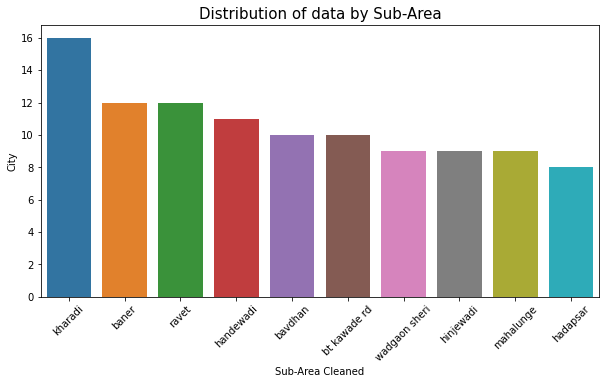

In [34]:
# Sub-Area
print(f"Unique Number of Sub-Area in the Data: {df1['Sub-Area Cleaned'].nunique()}")

temp = df1.groupby('Sub-Area Cleaned')['City'].count().reset_index().sort_values(by='City',ascending=False)[:10]
display(temp)

plt.figure(figsize=(10,5))
sns.barplot(x=temp['Sub-Area Cleaned'],y=temp['City'])
plt.title("Distribution of data by Sub-Area",size=15)
plt.xticks(rotation=45)
plt.show()

#### Distribution of Company and Township:

([Contents:](#Contents:))

Unique Number of Company in the Data: 37


,Company Name Cleaned,City
0,mantra properties,29
1,kundan spaces,14
2,unique properties,11
3,shapoorji paloonji,10
4,jhala group,10
5,vijaya laxmi creations,9
6,puraniks,8
7,ravima ventures,7
8,lush life,6
9,vijaya laxmi infrarealtors,6


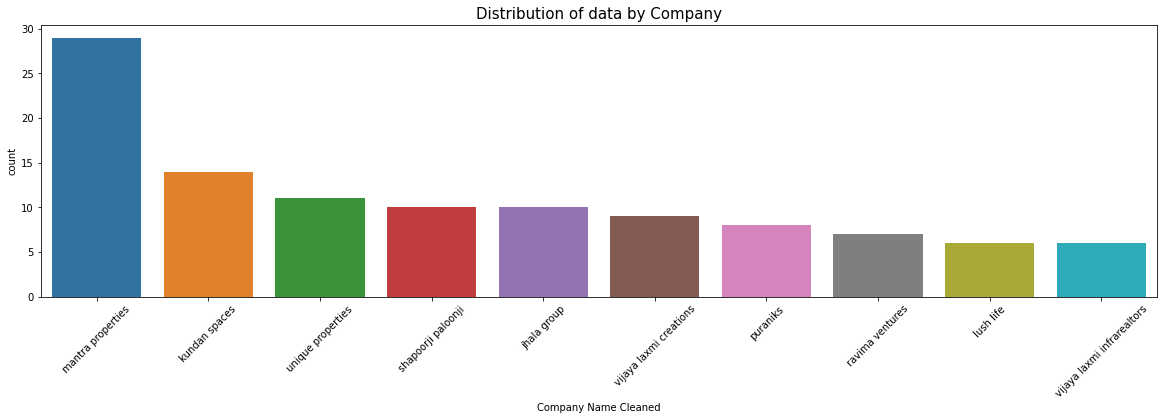

In [35]:
# Company
print(f"Unique Number of Company in the Data: {df1['Company Name Cleaned'].nunique()}")

display(df1.groupby('Company Name Cleaned')['City'].count().sort_values(ascending=False).reset_index()[:10])

plt.figure(figsize=(20,5))
sns.countplot(df1['Company Name Cleaned'],
              order=df1.groupby('Company Name Cleaned')['City'].count().sort_values(ascending=False).index[:10])
plt.title("Distribution of data by Company",size=15)
plt.xticks(rotation=45)
plt.show()

Unique Number of Township/Society in the Data: 54


,TownShip Name/ Society Name Cleaned,City
0,mantra 29 gold,13
1,eternia 2.0,8
2,newton homes,6
3,oxy beaumonde,6
4,parklane urbanjoy,6
5,presidia,6
6,satyam serenity,6
7,k ville,6
8,satyam shery,6
9,abitante fiore,6


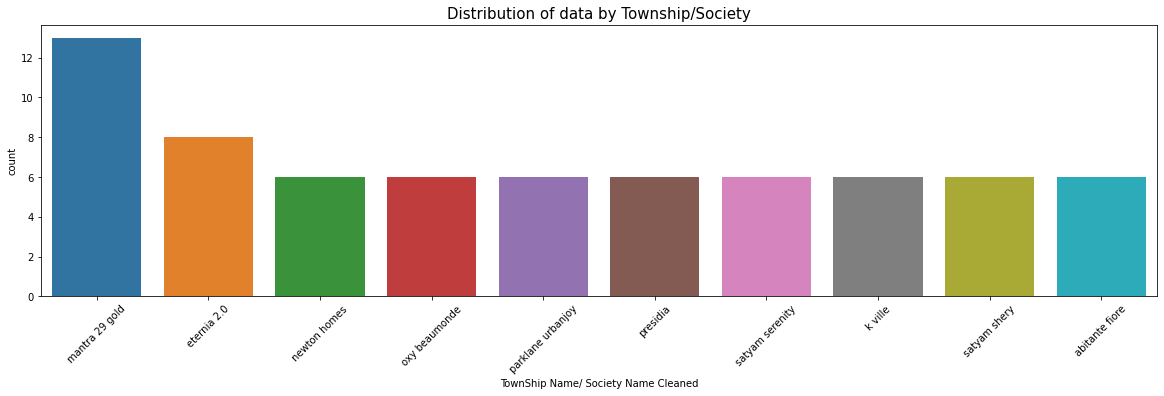

In [36]:
# Township
print(f"Unique Number of Township/Society in the Data: {df1['TownShip Name/ Society Name Cleaned'].nunique()}")

display(df1.groupby('TownShip Name/ Society Name Cleaned')['City'].count().sort_values(ascending=False)
          .reset_index()[:10])

plt.figure(figsize=(20,5))
sns.countplot(df1['TownShip Name/ Society Name Cleaned'],
              order=df1.groupby('TownShip Name/ Society Name Cleaned')['City'].count()
                      .sort_values(ascending=False).index[:10])
plt.title("Distribution of data by Township/Society",size=15)
plt.xticks(rotation=45)
plt.show()

#### Distribution of Property Area and Price:

([Contents:](#Contents:))

Summary Statistics of Property Area:


,Property Area in Sq. Ft. Cleaned
count,200.000000
mean,894.060000
std,380.256831
min,113.000000
25%,670.000000
50%,800.500000
75%,1041.250000
max,2447.000000


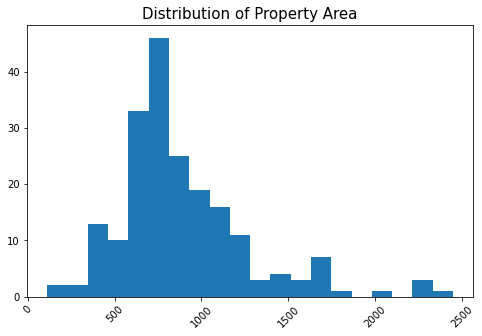

In [37]:
print("Summary Statistics of Property Area:")
display(df1[['Property Area in Sq. Ft. Cleaned']].describe())

plt.figure(figsize=(8,5))
plt.hist(df1['Property Area in Sq. Ft. Cleaned'],bins=20)
plt.title("Distribution of Property Area",size=15)
plt.xticks(rotation=45)
plt.show()

Summary Statistics of Price:


,Price in lakhs Cleaned
count,199.000000
mean,95.258291
std,101.869843
min,13.190000
25%,51.500000
50%,70.000000
75%,99.435000
max,930.000000


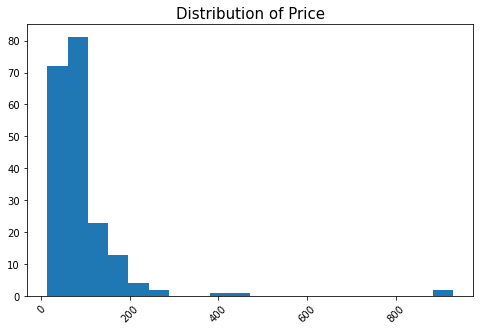

In [38]:
print("Summary Statistics of Price:")
display(df1[['Price in lakhs Cleaned']].describe())

plt.figure(figsize=(8,5))
plt.hist(df1['Price in lakhs Cleaned'],bins=20)
plt.title("Distribution of Price",size=15)
plt.xticks(rotation=45)
plt.show()

In [39]:
df1.head()

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


* How Property area correlates with the price?

* How each amenities correlates with the price?

* Create sum of all amenities and check how many Townships have all of it? And how the value of those properite vaires wrt others?

## Multivariate Analysis:

([Contents:](#Contents:))

Multivariate analysis helps us to understand how two or more columns are related to each other and its relationship with the target variable.

Based on the initial understanding of the different columns in the data (univariate analysis), we can create some hypothesis (if any) or try to ask more complex questions such as:
* How Property area correlates with the price?
* How each amenities correlates with the price?
* What are the 3 main amenities that the top 10% priced properties have?

This is not the exhaustive list but good to start with.

#### How Property area correlates with the price?

([Contents:](#Contents:))

,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
count,200.000000,199.000000
mean,894.060000,95.258291
std,380.256831,101.869843
min,113.000000,13.190000
25%,670.000000,51.500000
50%,800.500000,70.000000
75%,1041.250000,99.435000
max,2447.000000,930.000000


Property Area in Sq. Ft. Cleaned    0.493096
Price in lakhs Cleaned              1.000000
Name: Price in lakhs Cleaned, dtype: float64


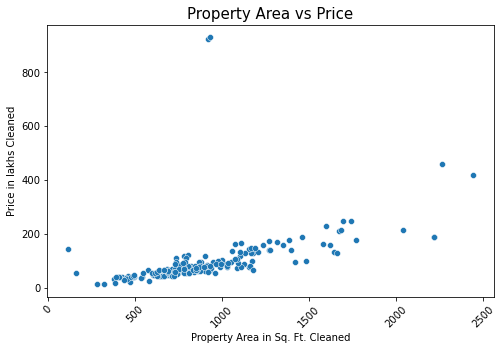

In [40]:
# Property Area vs Price
temp = df1[['Property Area in Sq. Ft. Cleaned','Price in lakhs Cleaned']]

display(temp.describe())

corr_matrix = temp.corr()
print(corr_matrix['Price in lakhs Cleaned'])

plt.figure(figsize=(8,5))
sns.scatterplot(temp['Property Area in Sq. Ft. Cleaned'],temp['Price in lakhs Cleaned'])
plt.title("Property Area vs Price",size=15)
plt.xticks(rotation=45)
plt.show()

#### How each amenities correlates with the price?

([Contents:](#Contents:))

In [41]:
df1.head(2)

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0


In [42]:
feats_to_plot = df1.columns.tolist()[8:15]
print(len(feats_to_plot))

7


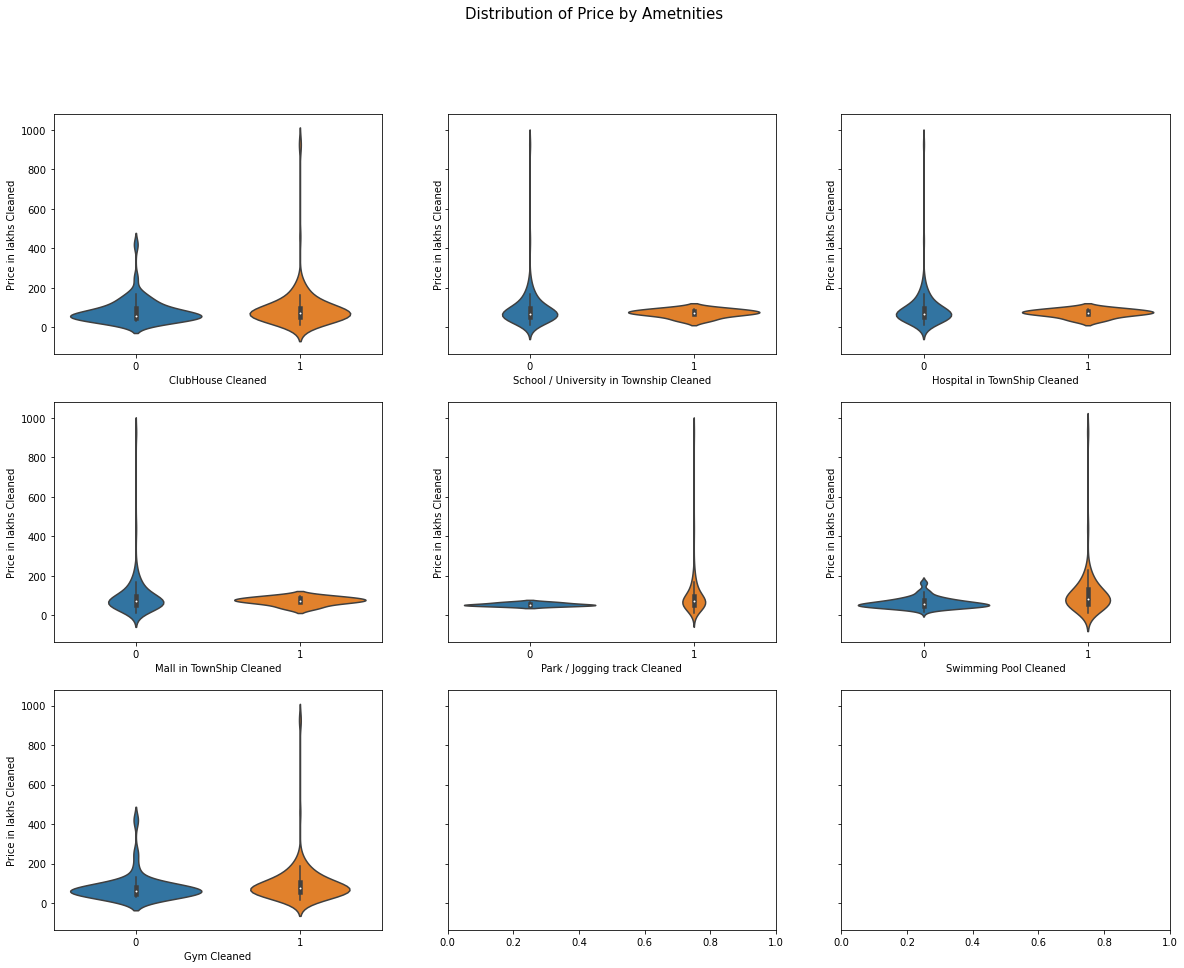

In [43]:
fig,ax = plt.subplots(nrows=3,ncols=3,sharey=True,figsize=(20,15))
plt.suptitle("Distribution of Price by Ametnities",size=15)
for i,col in enumerate(feats_to_plot):
    sns.violinplot(x = df1[col],y=df1['Price in lakhs Cleaned'],ax=ax[i//3,i%3])

#### What are the 3 main amenities that the top 10% priced properties have?

([Contents:](#Contents:))

In [44]:
# Filter for top 10% priced properties 
df1[['Price in lakhs Cleaned']].describe()

,Price in lakhs Cleaned
count,199.000000
mean,95.258291
std,101.869843
min,13.190000
25%,51.500000
50%,70.000000
75%,99.435000
max,930.000000


,Amenities,Popularity
4,Park / Jogging track Cleaned,81
6,Gym Cleaned,71
5,Swimming Pool Cleaned,66
0,ClubHouse Cleaned,62
1,School / University in Township Cleaned,2
2,Hospital in TownShip Cleaned,2
3,Mall in TownShip Cleaned,2


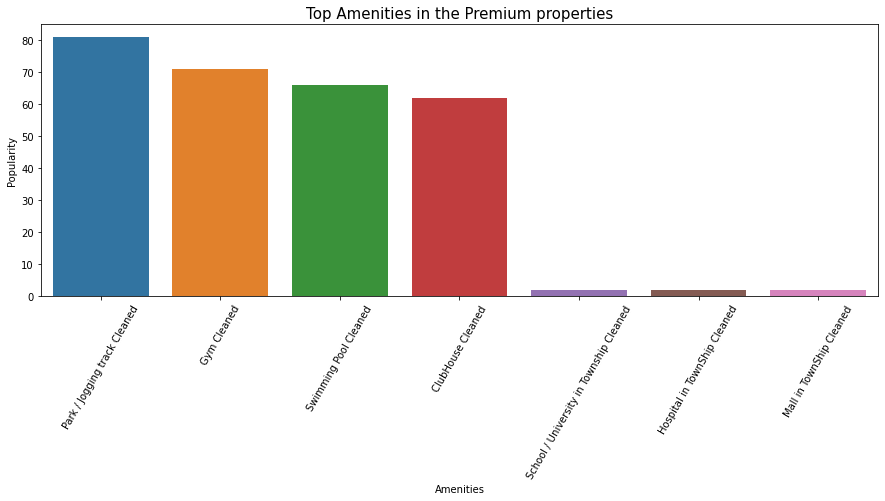

In [45]:
# selecting threshold as 80 Lakhs
amenities_cols = df1.columns.tolist()[8:15]

temp = df1[df1['Price in lakhs Cleaned']>=80][amenities_cols].sum().reset_index()
temp.rename(columns={'index':'Amenities',0:'Popularity'},inplace=True)
temp = temp.sort_values(by='Popularity',ascending=False)
display(temp)

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Amenities'],y=temp['Popularity'])
plt.title("Top Amenities in the Premium properties",size=15)
plt.xticks(rotation=60)
plt.show()

## Treating Nulls and saving the data:

([Contents:](#Contents:))

In [46]:
df1.head()

,City,State,Country,Property Type Cleaned,Sub-Area Cleaned,Company Name Cleaned,TownShip Name/ Society Name Cleaned,Description Cleaned,ClubHouse Cleaned,School / University in Township Cleaned,Hospital in TownShip Cleaned,Mall in TownShip Cleaned,Park / Jogging track Cleaned,Swimming Pool Cleaned,Gym Cleaned,Property Area in Sq. Ft. Cleaned,Price in lakhs Cleaned
0,pune,maharashtra,india,1,bavdhan,shapoorji paloonji,vanaha,shapoorji paloonji comunity located in the sub...,1,1,1,1,1,1,1,492.0,39.0
1,pune,maharashtra,india,2,bavdhan,shapoorji paloonji,vanaha,vanaha township located near the lonavala hill...,1,1,1,1,1,1,1,774.0,65.0
2,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha society is suitable for all aged group ...,1,1,1,1,1,1,1,889.0,74.0
3,pune,maharashtra,india,3,bavdhan,shapoorji paloonji,vanaha,vanaha township are offering 3bhk grand prpoer...,1,1,1,1,1,1,1,1018.0,89.0
4,pune,maharashtra,india,2,mahalunge,godrej properties,godrej hills retreat,the area is a hub of prestigious schools like ...,1,1,1,1,1,1,1,743.0,74.0


In [47]:
df1.isna().sum()

City                                       0
State                                      0
Country                                    0
Property Type Cleaned                      0
Sub-Area Cleaned                           0
Company Name Cleaned                       0
TownShip Name/ Society Name Cleaned        0
Description Cleaned                        0
ClubHouse Cleaned                          0
School / University in Township Cleaned    0
Hospital in TownShip Cleaned               0
Mall in TownShip Cleaned                   0
Park / Jogging track Cleaned               0
Swimming Pool Cleaned                      0
Gym Cleaned                                0
Property Area in Sq. Ft. Cleaned           0
Price in lakhs Cleaned                     1
dtype: int64

In [48]:
df_final = df1.dropna()
df_final.isna().sum()

City                                       0
State                                      0
Country                                    0
Property Type Cleaned                      0
Sub-Area Cleaned                           0
Company Name Cleaned                       0
TownShip Name/ Society Name Cleaned        0
Description Cleaned                        0
ClubHouse Cleaned                          0
School / University in Township Cleaned    0
Hospital in TownShip Cleaned               0
Mall in TownShip Cleaned                   0
Park / Jogging track Cleaned               0
Swimming Pool Cleaned                      0
Gym Cleaned                                0
Property Area in Sq. Ft. Cleaned           0
Price in lakhs Cleaned                     0
dtype: int64

In [49]:
# Saving the final dataframe with selected features as a csv file
# df_final.to_csv('data/real_estate_selected.csv',index=False)